OkCupid dataset HomeWork by Shay Dekel (ID: 040372120)

 1.Reading Dataset

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline 

### Read some of the data
# data = pd.read_csv('C:/Users/sdekel.TA7SHAYDE-L/Dropbox/PythonCourse/Datasets/OkCupid/profiles.csv', nrows = 100, na_values=['NA'] )

### Read the whole data
data = pd.read_csv('C:/Users/sdekel.TA7SHAYDE-L/Dropbox/PythonCourse/Datasets/OkCupid/profiles.csv', na_values=['NA'] )

 2.Data Description

In [365]:
data.head() ## take the first 5 items of the table

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [366]:
data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


3.Data Correction

In [367]:
data['height' ] += 100   # the data has to be shifted with 100cm

In [368]:
data_male   = data[ data['sex'] == 'm'  ]
data_female = data[ data['sex'] == 'f'  ]

4.Males - joint distributions of ages and heights (KDE)

C:\Users\sdekel.TA7SHAYDE-L\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


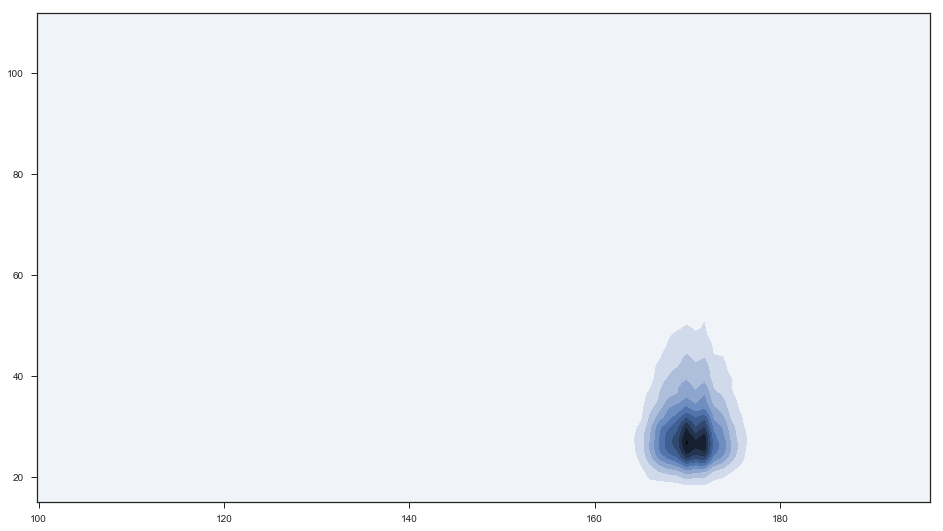

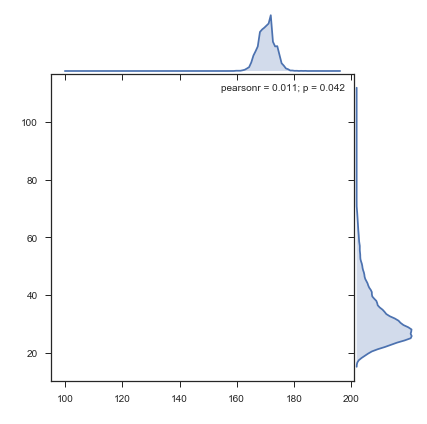

In [369]:
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
j1 = sb.jointplot(ax = ax, x ='height' , y = 'age', data = data_male , kind='kde' ,space = 0)
j1.set_axis_labels(xlabel='height', ylabel='age', color = 'w')

5.Females - joint distributions of ages and heights (KDE)

C:\Users\sdekel.TA7SHAYDE-L\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


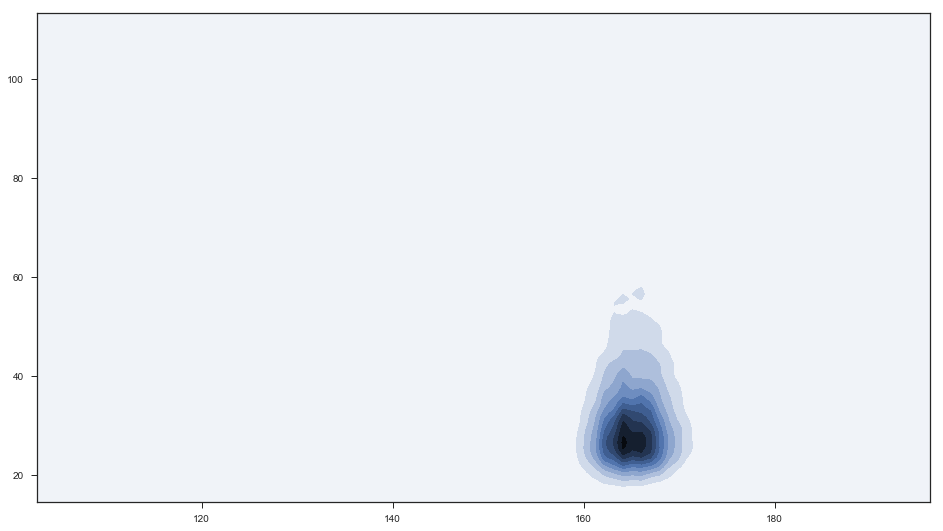

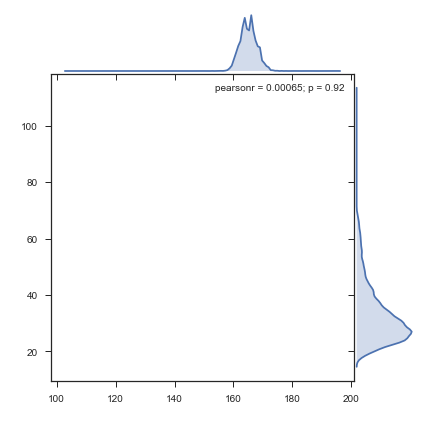

In [370]:
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)
j2 = sb.jointplot(ax = ax,x ='height' , y = 'age', data = data_female , kind='kde', space =0 )
j2.set_axis_labels(xlabel='height', ylabel='age', color = 'w')

6.BarPlot - How education influence the income 

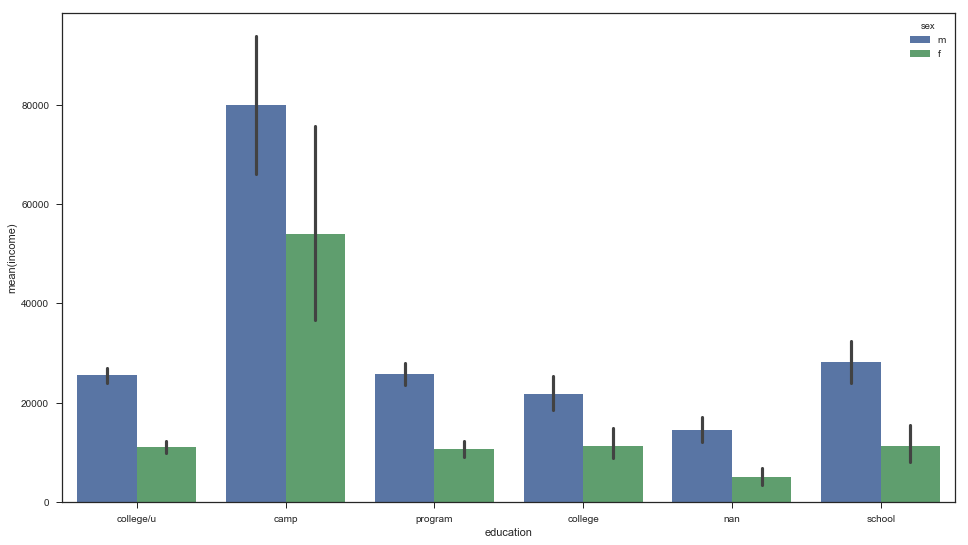

In [371]:

a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)

# groupbyEducation = data.groupby(['education']).count().reset_index()
# groupbyEducation['age']
# groupbyEducation['education'] = groupbyEducation['education'].apply(lambda x: x.split()[0][0:5])  

data['education'] = data['education'].apply(lambda x: str(x).split()[-1][0:9])  
bp1 = sb.barplot(ax = ax,y = 'income', x = 'education',  data = data , hue = 'sex' )


7.How the locations are distributed 

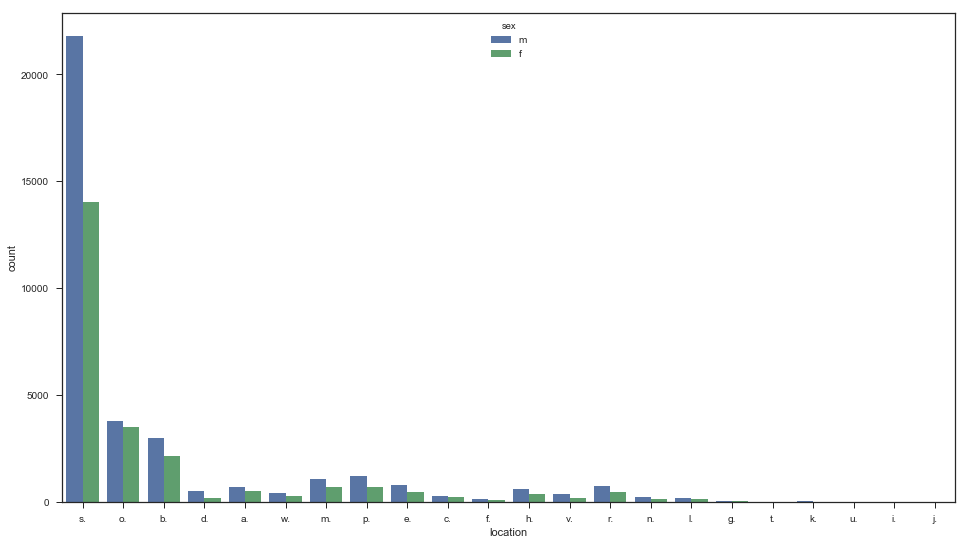

In [372]:
data['diet'].unique()
a4_dims = (16, 9)
fig, ax = plt.subplots(figsize=a4_dims)

# groupbyDiet = data.groupby(['location']).count().reset_index()
# data['location'].unique()
# groupbyDiet['location'] =  groupbyDiet['location'].apply(lambda x: x.split()[0][0:9])  

data['location'] = data['location'].apply(lambda x: x.split()[0][0] + '.'  )
sb.countplot(ax = ax, x='location',data = data, hue = 'sex')


9.How the ages are distributed according to the education type

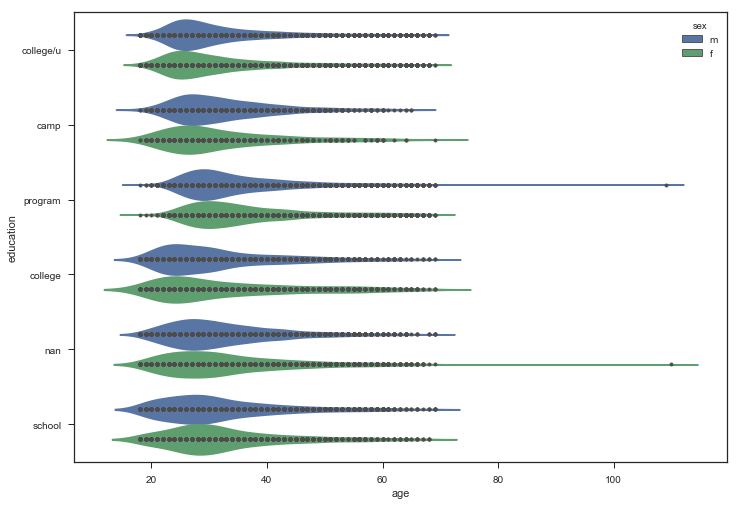

In [373]:
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # # the size of A4 paper
sb.violinplot(x = 'age' ,y = 'education', data=data, inner="points", ax=ax,hue = 'sex')    


10.How the ages are related to the income 

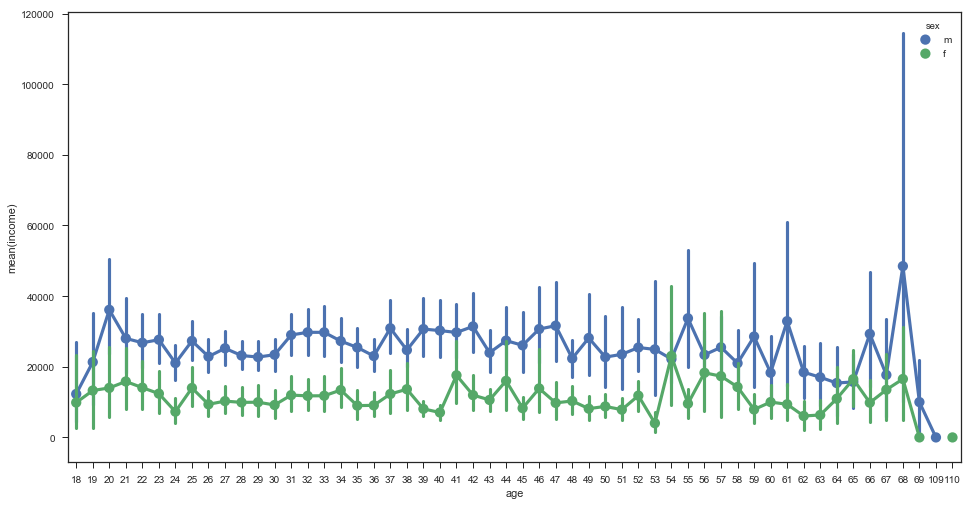

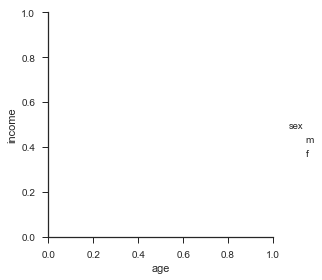

In [374]:
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16, 8.27) # # the size of A4 paper
sb.factorplot(ax = ax,x="age", y="income", hue="sex", data=data)


11.A regression  - try to fit a model to a  age by income according to the body type

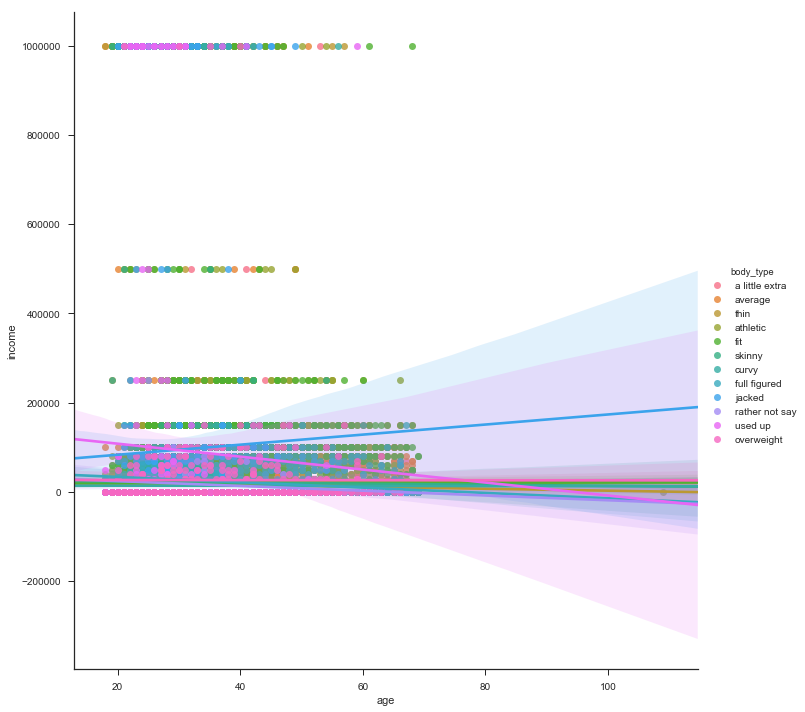

In [375]:


sbplot = sb.lmplot(x="age", y="income",  data=data, hue = 'body_type', size = 10,aspect =1)

